## Foward Price Prediction Using Transformed DF Predicting P0

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline_P0_foward_price

In [2]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features = True, remove_outliers = True, deal_with_skewness = True)

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Document Performance of the Models

In [3]:
model_performance = []

In [4]:
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

## Ridge with Alpha 3

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=3)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})




Mean Squared Error: 14774.438479894498
Root Mean Squared Error: 121.55014800441215
Mean Absolute Error: 99.75650827427381
R-squared: -262.51489454377264
Explained Variance Score: -222.23379332357166


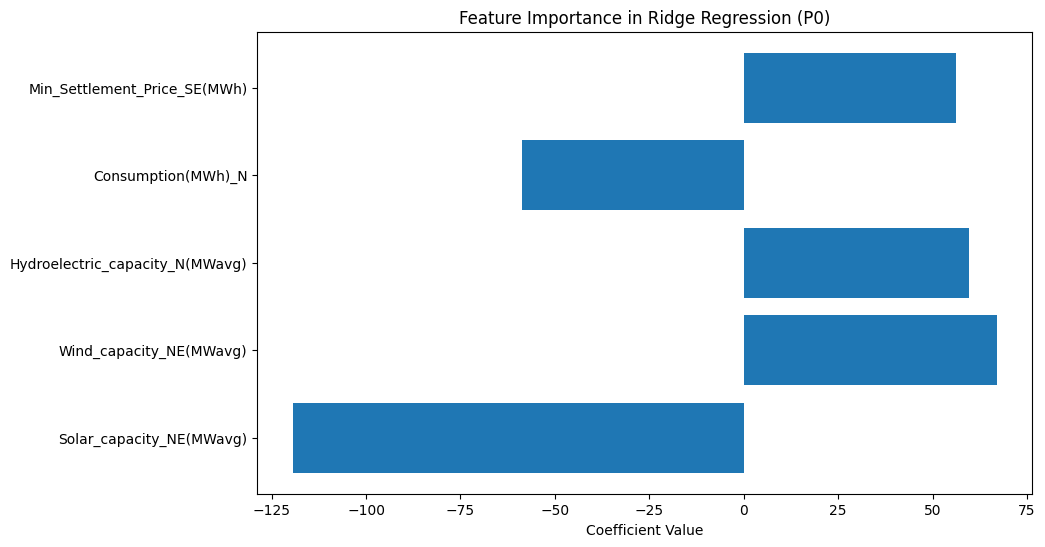

In [6]:
# Get the coefficients of the fitted model
coefficients = ridge_model.coef_

# Create a DataFrame to pair the feature names with their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort the coefficients by their absolute value to see the most influential features
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
sorted_coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)
# Get the top 5 features with the highest absolute coefficients
sorted_coeff_df = sorted_coeff_df.head(5)
# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_coeff_df['Feature'], sorted_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression (P0)')
plt.show()

## Ridge, Low Alpha

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})



Mean Squared Error: 21415.234247704597
Root Mean Squared Error: 146.33944870643936
Mean Absolute Error: 118.15112329365775
R-squared: -380.95923331323536
Explained Variance Score: -340.6416700838637


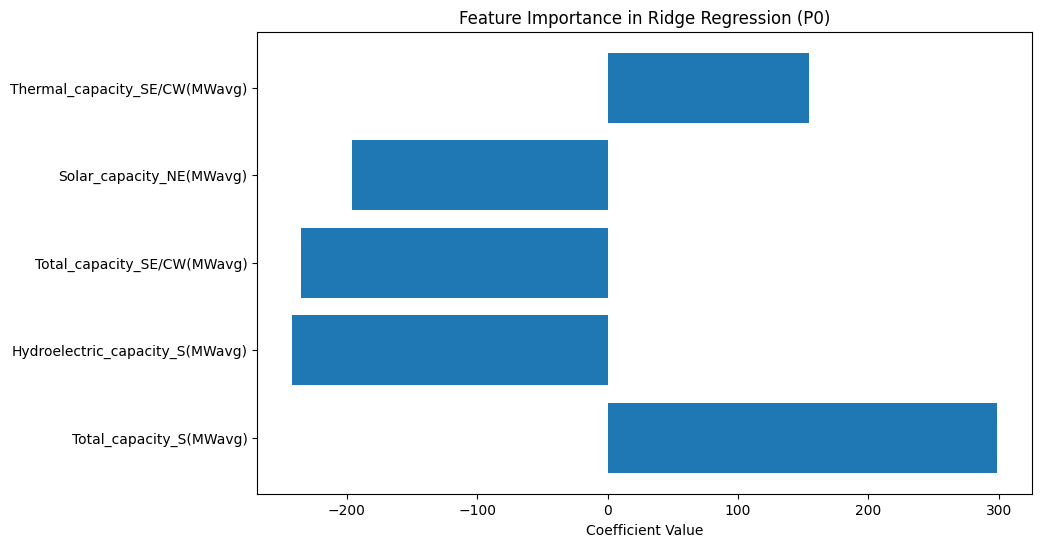

In [8]:
# Get the coefficients of the fitted model
coefficients = ridge_model.coef_

# Create a DataFrame to pair the feature names with their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort the coefficients by their absolute value to see the most influential features
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
sorted_coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)
# Get the top 5 features with the highest absolute coefficients
sorted_coeff_df = sorted_coeff_df.head(5)
# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_coeff_df['Feature'], sorted_coeff_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression (P0)')
plt.show()

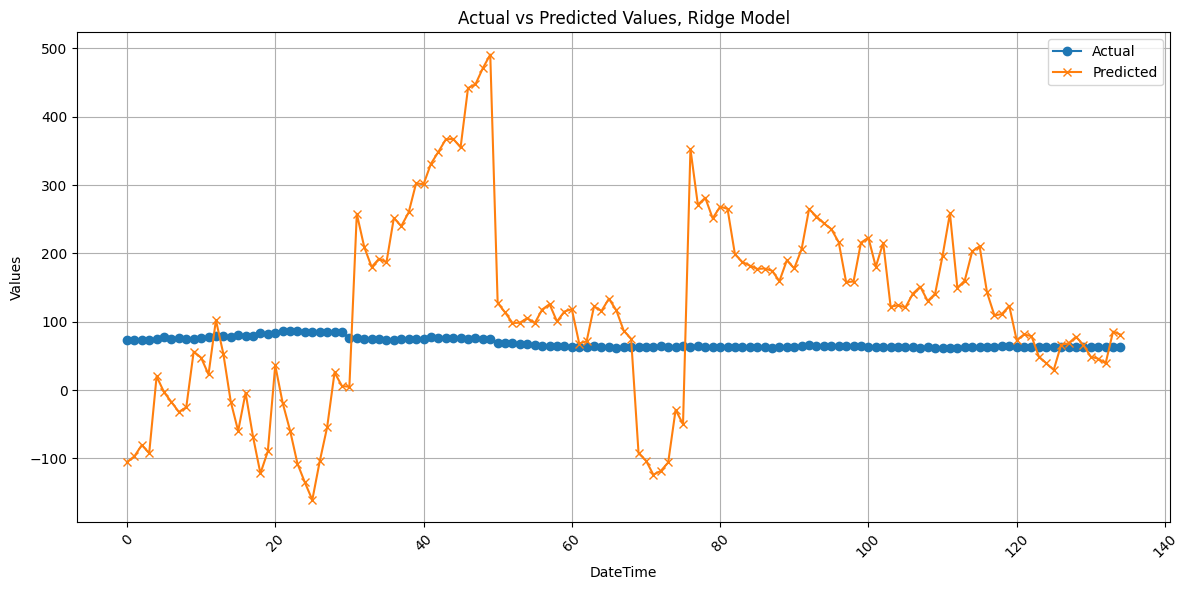

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Low Alpha

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
explained_variance = explained_variance_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': lasso_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})

Mean Squared Error: 11564.919930337834
Root Mean Squared Error: 107.54031769684258
Mean Absolute Error: 82.01929574972598
R-squared: -205.2703540305317
Explained Variance Score: -164.9841907924659


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.568e+04, tolerance: 9.482e+02
  model = cd_fast.enet_coordinate_descent(


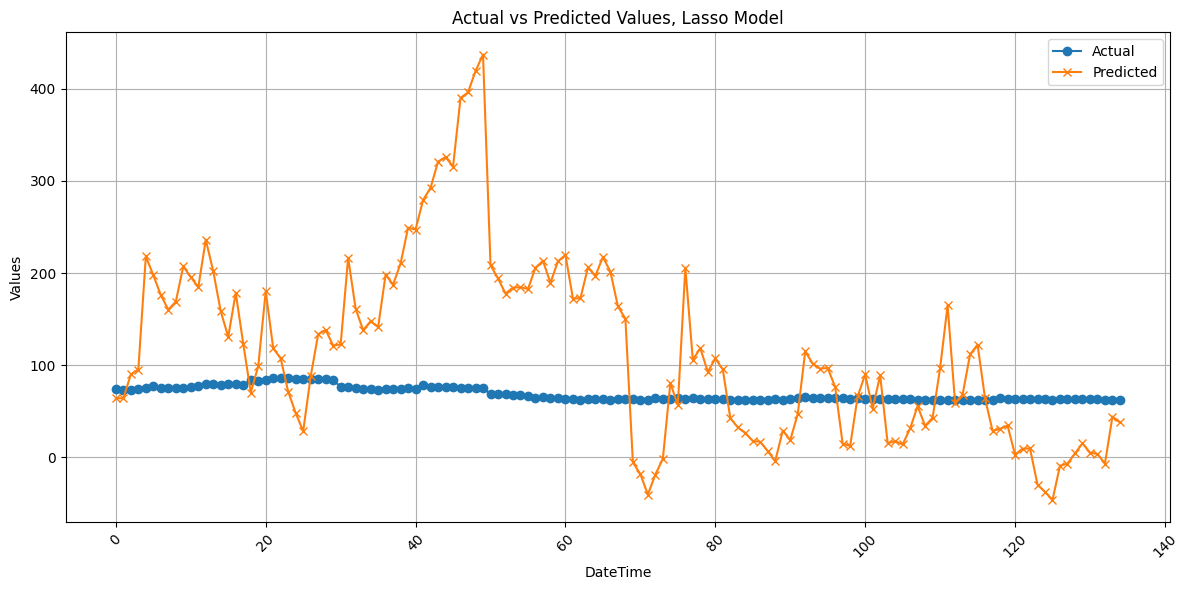

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Lasso Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Gradient Boosted

In [12]:
import xgboost as xgb
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 424.6588864374387
Root Mean Squared Error: 20.607253248248266
Mean Squared Error: 424.6588864374387
Root Mean Squared Error: 20.607253248248266
R-squared: -6.574158695027215


In [13]:
x_val.columns

Index(['P1', 'Min_Settlement_Price_SE(MWh)', 'Hydro_Inflow_N(MWavg)',
       'Hydro_Inflow_NE(MWavg)', 'Hydro_Inflow_S(MWavg)',
       'Hydro_Inflow_SE/CW(MWavg)', 'Daily_Sum_Hydro_Inflow(MWavg)',
       'Solar_Generated_Sum_NE(MWavg)', 'Solar_Generated_Sum_SE/CW(MWavg)',
       'Daily_Sum_Solar_Generated(MWavg)', 'Wind_Generation_N(MWavg)',
       'Wind_Generation_NE(MWavg)', 'Wind_Generation_S(MWavg)',
       'Wind_Generation_SUM(MWavg)', 'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
       'Thermal_capacity_S(MWavg)', 'Wind_capacity_NE(MWavg)',
       'Solar_capacity_NE(MWavg)', 'Solar_capacity_SE/CW(MWavg)',
       'Total_capacity_NE(MWavg)', 'Total_capacity_N(MWavg)',
       'Total_capacity_SE/CW(MWavg)', 'Total_capacity_S(MWavg)',
       'Consumption(MWh)_N', 'Consumption(MWh)_NE', 'Consumption(MWh)_S',
   

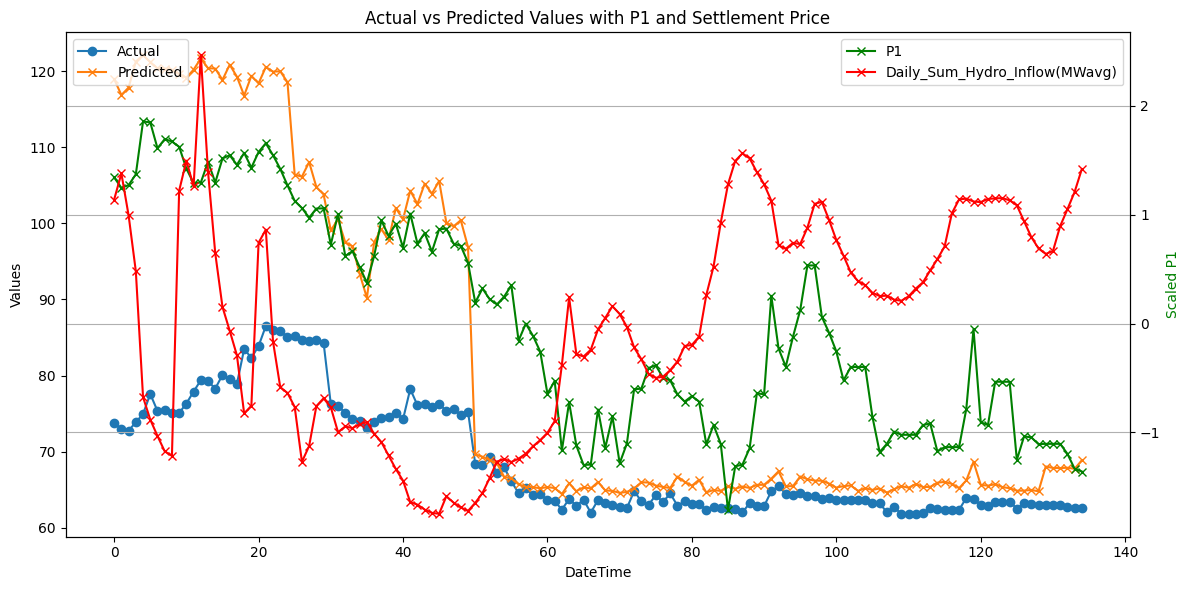

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Actual and Predicted values on the primary y-axis
ax1.plot(x_val.index, y_val, label='Actual', marker='o')
ax1.plot(x_val.index, y_pred, label='Predicted', marker='x')
#ax1.plot(x_val.index, x_val['Average_Settlement_Price_SE/CW(MWh)'], label='Settlement Price', marker='x')

# Set labels for the primary y-axis
ax1.set_xlabel('DateTime')
ax1.set_ylabel('Values')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot P1 on the secondary y-axis
ax2.plot(x_val.index, x_val['P1'], label='P1', color='green', marker='x')
ax2.plot(x_val.index, x_val['Daily_Sum_Hydro_Inflow(MWavg)'], label='Daily_Sum_Hydro_Inflow(MWavg)', color='red', marker='x')

# Set the labels for the secondary y-axis
ax2.set_ylabel('Scaled P1', color='green')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid and title
plt.grid(True)
plt.title('Actual vs Predicted Values with P1 and Settlement Price')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
3,"XGBRegressor(base_score=None, booster=None, ca...",424.658886,20.607253,NaN,-6.574159,NaN
2,Lasso(alpha=0.1),11564.919930,107.540318,82.019296,-205.270354,-164.984191
0,Ridge(alpha=3),14774.438480,121.550148,99.756508,-262.514895,-222.233793
1,Ridge(alpha=0.1),21415.234248,146.339449,118.151123,-380.959233,-340.641670
